In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import joblib

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("base_pred_to_clf_trans.csv")

In [3]:
df.shape

(2100, 53)

# Подготовка выборок

In [4]:
X = df.drop("label", axis = 1).copy()
y = df["label"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [6]:
scal = StandardScaler()
x_train_scaled = scal.fit_transform(x_train)
x_test_scaled = scal.transform(x_test)

In [7]:
x_train_scaled.shape

(1680, 52)

# Базовый MLP

In [10]:
mlp1 = MLPClassifier(random_state=42, verbose=True)
mlp1.fit(x_train_scaled, y_train)
display(mlp1.score(x_train_scaled, y_train))

Iteration 1, loss = 1.72753837
Iteration 2, loss = 0.93360558
Iteration 3, loss = 0.58974466
Iteration 4, loss = 0.44895199
Iteration 5, loss = 0.38139318
Iteration 6, loss = 0.34259999
Iteration 7, loss = 0.31646338
Iteration 8, loss = 0.29700516
Iteration 9, loss = 0.28305949
Iteration 10, loss = 0.26987777
Iteration 11, loss = 0.25990661
Iteration 12, loss = 0.25052974
Iteration 13, loss = 0.24362280
Iteration 14, loss = 0.23456988
Iteration 15, loss = 0.22797948
Iteration 16, loss = 0.22259913
Iteration 17, loss = 0.21646426
Iteration 18, loss = 0.21099461
Iteration 19, loss = 0.20668112
Iteration 20, loss = 0.20170764
Iteration 21, loss = 0.19810092
Iteration 22, loss = 0.19366339
Iteration 23, loss = 0.18950953
Iteration 24, loss = 0.18585045
Iteration 25, loss = 0.18327178
Iteration 26, loss = 0.17983015
Iteration 27, loss = 0.17676302
Iteration 28, loss = 0.17327257
Iteration 29, loss = 0.16992943
Iteration 30, loss = 0.16749511
Iteration 31, loss = 0.16500091
Iteration 32, los

0.9880952380952381

In [12]:
print(classification_report(y_test, mlp1.predict(x_test_scaled)))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       341
           2       0.88      0.78      0.82        18
           3       0.90      0.82      0.86        22
           4       0.82      0.79      0.81        39

    accuracy                           0.95       420
   macro avg       0.89      0.85      0.87       420
weighted avg       0.95      0.95      0.95       420



In [13]:
print(classification_report(y_train, mlp1.predict(x_train_scaled)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1364
           2       0.89      0.92      0.90        71
           3       0.99      0.99      0.99        91
           4       0.94      0.94      0.94       154

    accuracy                           0.99      1680
   macro avg       0.95      0.96      0.96      1680
weighted avg       0.99      0.99      0.99      1680



# Grid MLP (iter 1)

In [8]:
mlp2 = MLPClassifier(random_state=42, verbose=True, max_iter=1000, early_stopping=True, n_iter_no_change=20)
activation = ['tanh', 'relu']
solver = ['sgd', 'adam']
alpha = [0.0001, 0.0005, 0.001, 0.0033, 0.01, 0.05]
learning_rate_init = [0.0005, 0.001, 0.005, 0.01]
learning_rate = ['constant', 'invscaling', 'adaptive']
hidden_layer_sizes = [(10,),(20,),(30,),(40,),(50,),(100,),(25,10),(30,10),(10,30),(10,100)]


param_grid = {'activation': activation,
               'solver': solver,
               'alpha': alpha,
               'learning_rate_init': learning_rate_init,
               'learning_rate': learning_rate,
               'hidden_layer_sizes': hidden_layer_sizes
}
gs = GridSearchCV(mlp2, param_grid, cv = 3, verbose = 3, n_jobs=-1)
gs.fit(x_train_scaled, y_train)
mlp_base_best = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits
Iteration 1, loss = 1.07068250
Validation score: 0.750000
Iteration 2, loss = 0.72945798
Validation score: 0.809524
Iteration 3, loss = 0.53787029
Validation score: 0.875000
Iteration 4, loss = 0.38872751
Validation score: 0.875000
Iteration 5, loss = 0.30642671
Validation score: 0.880952
Iteration 6, loss = 0.25350584
Validation score: 0.880952
Iteration 7, loss = 0.21987063
Validation score: 0.898810
Iteration 8, loss = 0.19878504
Validation score: 0.892857
Iteration 9, loss = 0.18854258
Validation score: 0.898810
Iteration 10, loss = 0.17547144
Validation score: 0.916667
Iteration 11, loss = 0.16810487
Validation score: 0.922619
Iteration 12, loss = 0.15795672
Validation score: 0.934524
Iteration 13, loss = 0.15027881
Validation score: 0.946429
Iteration 14, loss = 0.14586974
Validation score: 0.898810
Iteration 15, loss = 0.14579474
Validation score: 0.946429
Iteration 16, loss = 0.14357671
Validation score: 0.940476


{'activation': 'tanh',
 'alpha': 0.0033,
 'hidden_layer_sizes': (25, 10),
 'learning_rate': 'constant',
 'learning_rate_init': 0.005,
 'solver': 'adam'}

In [9]:
joblib.dump(mlp_base_best, "MLP_base_best1.pkl")

['MLP_base_best1.pkl']

In [10]:
MLP_base_best1 = joblib.load("MLP_base_best1.pkl")

In [11]:
print(classification_report(y_test, MLP_base_best1.predict(x_test_scaled)))

              precision    recall  f1-score   support

           1       0.99      0.98      0.98       341
           2       0.70      0.89      0.78        18
           3       0.79      0.86      0.83        22
           4       0.82      0.69      0.75        39

    accuracy                           0.95       420
   macro avg       0.82      0.86      0.84       420
weighted avg       0.95      0.95      0.95       420



<AxesSubplot:>

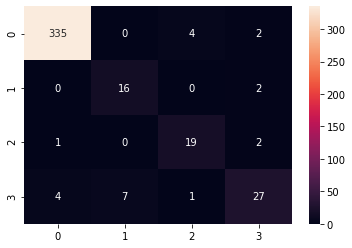

In [12]:
sns.heatmap(confusion_matrix(y_test,MLP_base_best1.predict(x_test_scaled)), annot=True, fmt="1")

# Grid MLP (iter 2)

In [14]:
MLP_base_best1_df = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
MLP_base_best1_df = MLP_base_best1_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
MLP_base_best1_df.head(10)

,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_learning_rate_init,param_solver,mean_test_score,rank_test_score
0,tanh,0.01,"(25, 10)",constant,0.005,adam,0.940476,1
1,tanh,0.01,"(25, 10)",invscaling,0.005,adam,0.940476,1
2,tanh,0.0033,"(25, 10)",invscaling,0.005,adam,0.940476,1
3,tanh,0.0033,"(25, 10)",adaptive,0.005,adam,0.940476,1
4,tanh,0.0033,"(25, 10)",constant,0.005,adam,0.940476,1
5,tanh,0.01,"(25, 10)",adaptive,0.005,adam,0.940476,1
6,tanh,0.001,"(25, 10)",adaptive,0.005,adam,0.939881,7
7,relu,0.001,"(10, 100)",invscaling,0.01,adam,0.939881,7
8,relu,0.001,"(10, 100)",constant,0.01,adam,0.939881,7
9,relu,0.001,"(10, 100)",adaptive,0.01,adam,0.939881,7


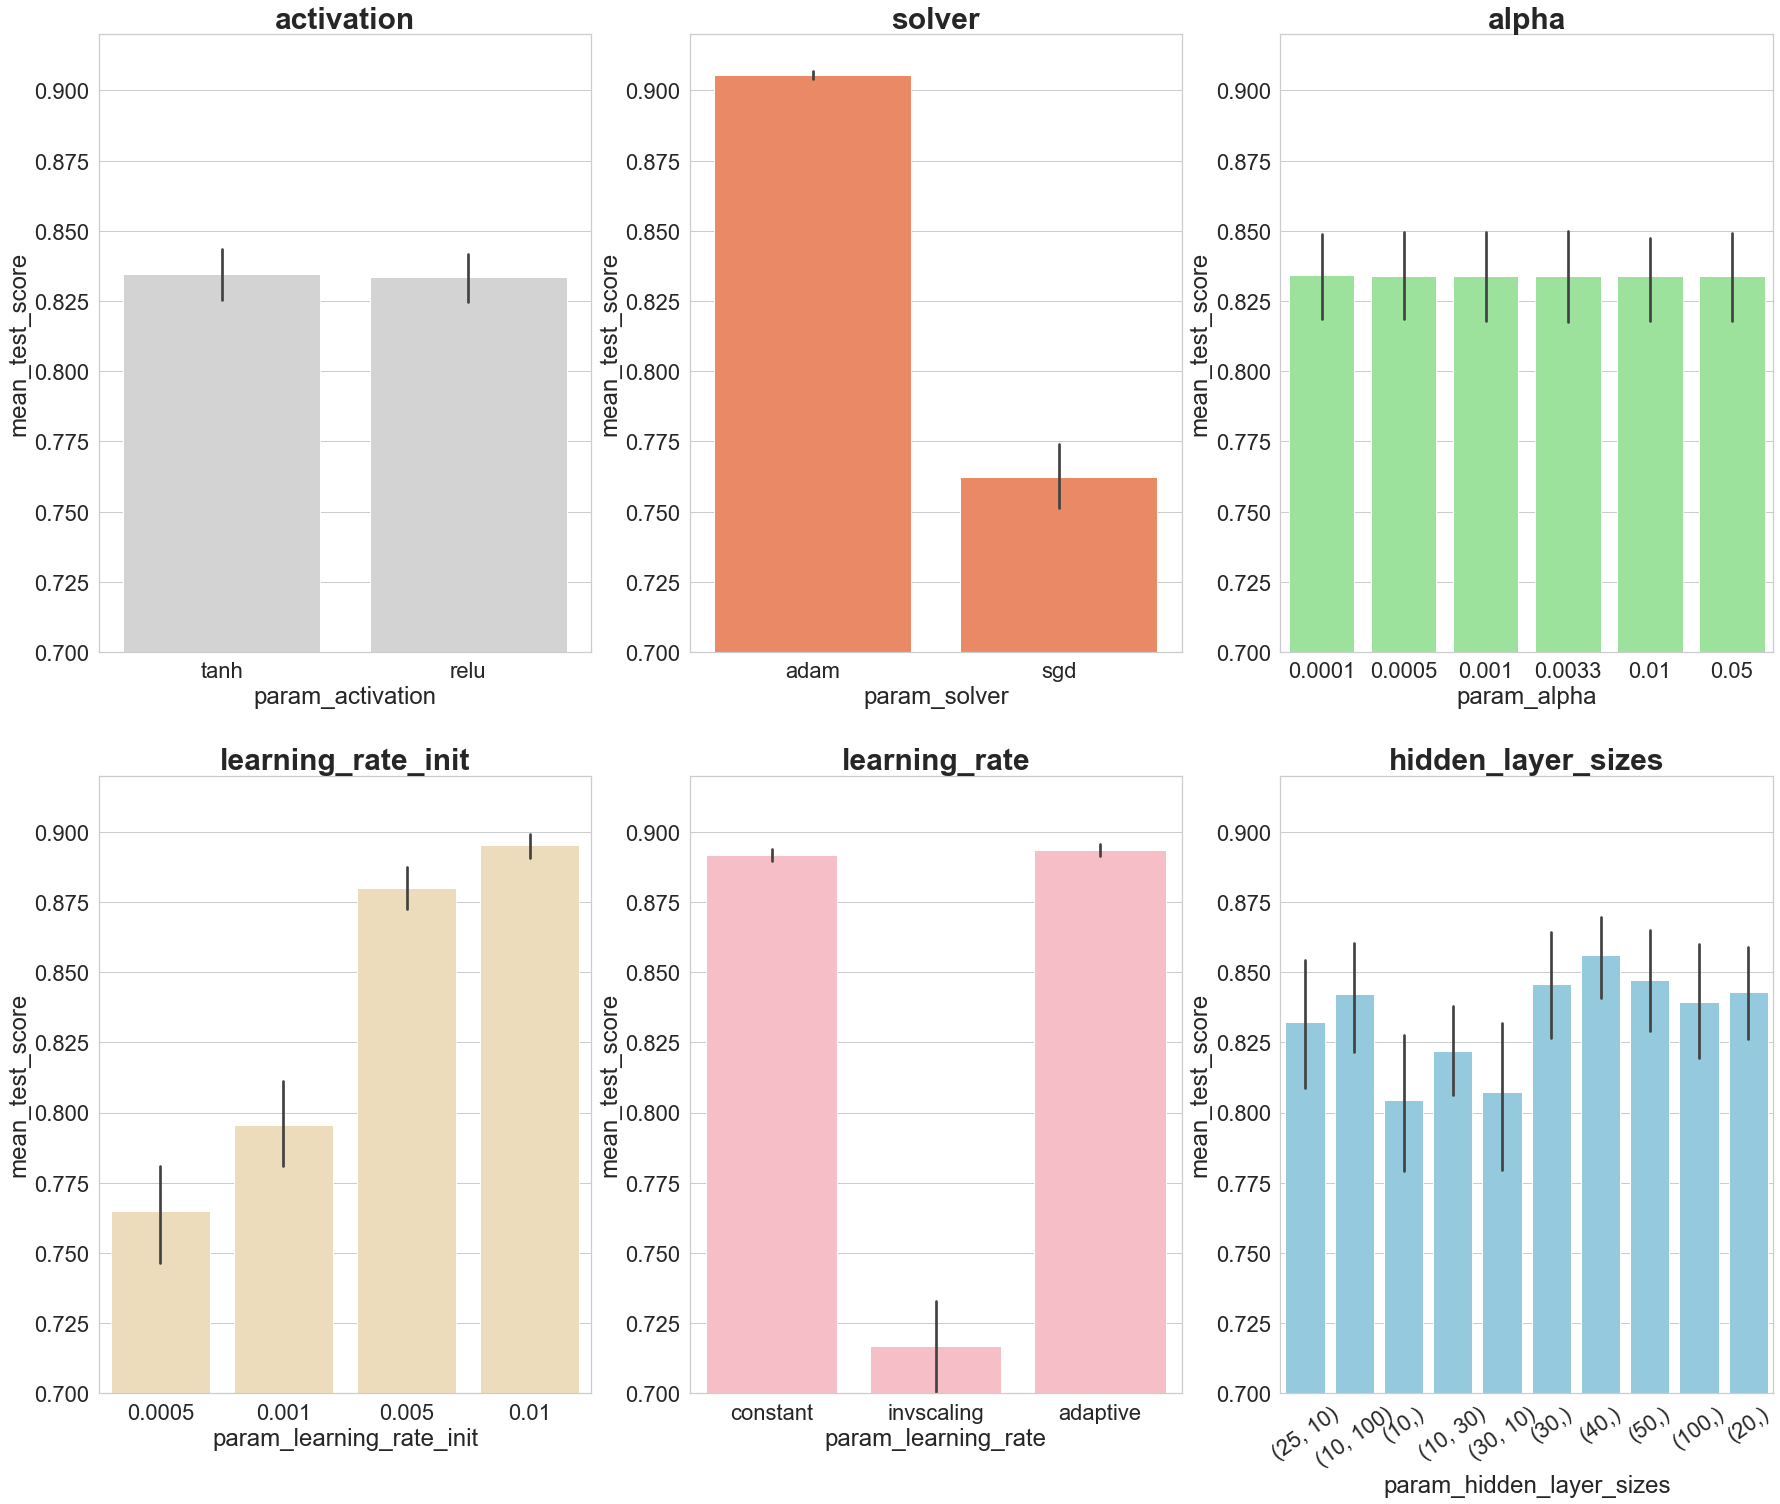

In [18]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_activation', y='mean_test_score', data=MLP_base_best1_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.70,.92]), axs[0,0].set_title(label = 'activation', size=30, weight='bold')
sns.barplot(x='param_solver', y='mean_test_score', data=MLP_base_best1_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.70,.92]), axs[0,1].set_title(label = 'solver', size=30, weight='bold')
sns.barplot(x='param_alpha', y='mean_test_score', data=MLP_base_best1_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.70,.92]), axs[0,2].set_title(label = 'alpha', size=30, weight='bold')
sns.barplot(x='param_learning_rate_init', y='mean_test_score', data=MLP_base_best1_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.70,.92]), axs[1,0].set_title(label = 'learning_rate_init', size=30, weight='bold')
sns.barplot(x='param_learning_rate', y='mean_test_score', data=MLP_base_best1_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.70,.92]), axs[1,1].set_title(label = 'learning_rate', size=30, weight='bold')
sns.barplot(x='param_hidden_layer_sizes',y='mean_test_score', data=MLP_base_best1_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.70,.92])
axs[1,2].set_title(label = 'hidden_layer_sizes', size=30, weight='bold')
plt.xticks(rotation=35)
plt.show()

In [19]:
mlp3 = MLPClassifier(random_state=42, verbose=True, max_iter=1000, early_stopping=True, n_iter_no_change=30)
activation = ['tanh', 'relu']
solver = ['adam']
alpha = [0.0001]
learning_rate_init = [0.01, 0.015, 0.02, 0.03]
learning_rate = ['constant'] # остальные работают только с оптимизатором "sgd"
hidden_layer_sizes = [(10,),(35,),(40,),(45,),(40,20),(40,30,20),(40,20,10),(40,10),
                      (30,20),(30,20,10),(40,80,10),(40,80),(10,50,100),(10,100,10)]


param_grid = {'activation': activation,
               'solver': solver,
               'alpha': alpha,
               'learning_rate_init': learning_rate_init,
               'learning_rate': learning_rate,
               'hidden_layer_sizes': hidden_layer_sizes
}
gs2 = GridSearchCV(mlp2, param_grid, cv = 4, verbose = 3, n_jobs=-1)
gs2.fit(x_train_scaled, y_train)
mlp_base_best2 = gs2.best_estimator_
gs2.best_params_

Fitting 4 folds for each of 112 candidates, totalling 448 fits
Iteration 1, loss = 1.03682783
Validation score: 0.773810
Iteration 2, loss = 0.54443400
Validation score: 0.904762
Iteration 3, loss = 0.31776556
Validation score: 0.886905
Iteration 4, loss = 0.22579889
Validation score: 0.940476
Iteration 5, loss = 0.18105171
Validation score: 0.934524
Iteration 6, loss = 0.15808188
Validation score: 0.916667
Iteration 7, loss = 0.15063343
Validation score: 0.952381
Iteration 8, loss = 0.13811667
Validation score: 0.940476
Iteration 9, loss = 0.13481097
Validation score: 0.946429
Iteration 10, loss = 0.12854212
Validation score: 0.940476
Iteration 11, loss = 0.12904664
Validation score: 0.940476
Iteration 12, loss = 0.11525159
Validation score: 0.964286
Iteration 13, loss = 0.10919646
Validation score: 0.958333
Iteration 14, loss = 0.10619072
Validation score: 0.958333
Iteration 15, loss = 0.10549575
Validation score: 0.940476
Iteration 16, loss = 0.10134299
Validation score: 0.928571
It

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (40,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'solver': 'adam'}

In [20]:
joblib.dump(mlp_base_best2, "MLP_base_best2.pkl")

['MLP_base_best2.pkl']

In [21]:
MLP_base_best2 = joblib.load("MLP_base_best2.pkl")

In [22]:
print(classification_report(y_test, MLP_base_best2.predict(x_test_scaled)))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       341
           2       0.71      0.94      0.81        18
           3       0.90      0.82      0.86        22
           4       0.86      0.64      0.74        39

    accuracy                           0.95       420
   macro avg       0.86      0.85      0.85       420
weighted avg       0.95      0.95      0.95       420



<AxesSubplot:>

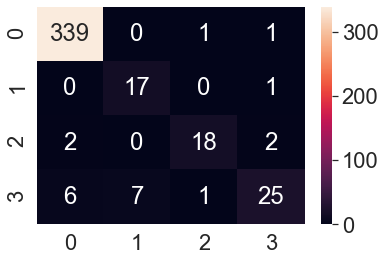

In [23]:
sns.heatmap(confusion_matrix(y_test,MLP_base_best2.predict(x_test_scaled)), annot=True, fmt="1")

In [24]:
MLP_base_best2_df = pd.DataFrame(gs2.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
MLP_base_best2_df = MLP_base_best2_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
MLP_base_best2_df.head(10)

,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_learning_rate_init,param_solver,split3_test_score,mean_test_score,rank_test_score
0,tanh,0.0001,"(40,)",constant,0.01,adam,0.957143,0.951786,1
1,tanh,0.0001,"(10,)",constant,0.02,adam,0.950000,0.950000,2
2,tanh,0.0001,"(10,)",constant,0.015,adam,0.945238,0.948214,3
3,tanh,0.0001,"(10,)",constant,0.03,adam,0.954762,0.948214,3
4,tanh,0.0001,"(10, 50, 100)",constant,0.01,adam,0.940476,0.948214,3
5,relu,0.0001,"(10, 50, 100)",constant,0.015,adam,0.947619,0.945238,6
6,tanh,0.0001,"(40,)",constant,0.015,adam,0.940476,0.944048,7
7,tanh,0.0001,"(40,)",constant,0.02,adam,0.950000,0.943452,8
8,relu,0.0001,"(10,)",constant,0.015,adam,0.933333,0.942262,9
9,tanh,0.0001,"(35,)",constant,0.01,adam,0.928571,0.939881,10


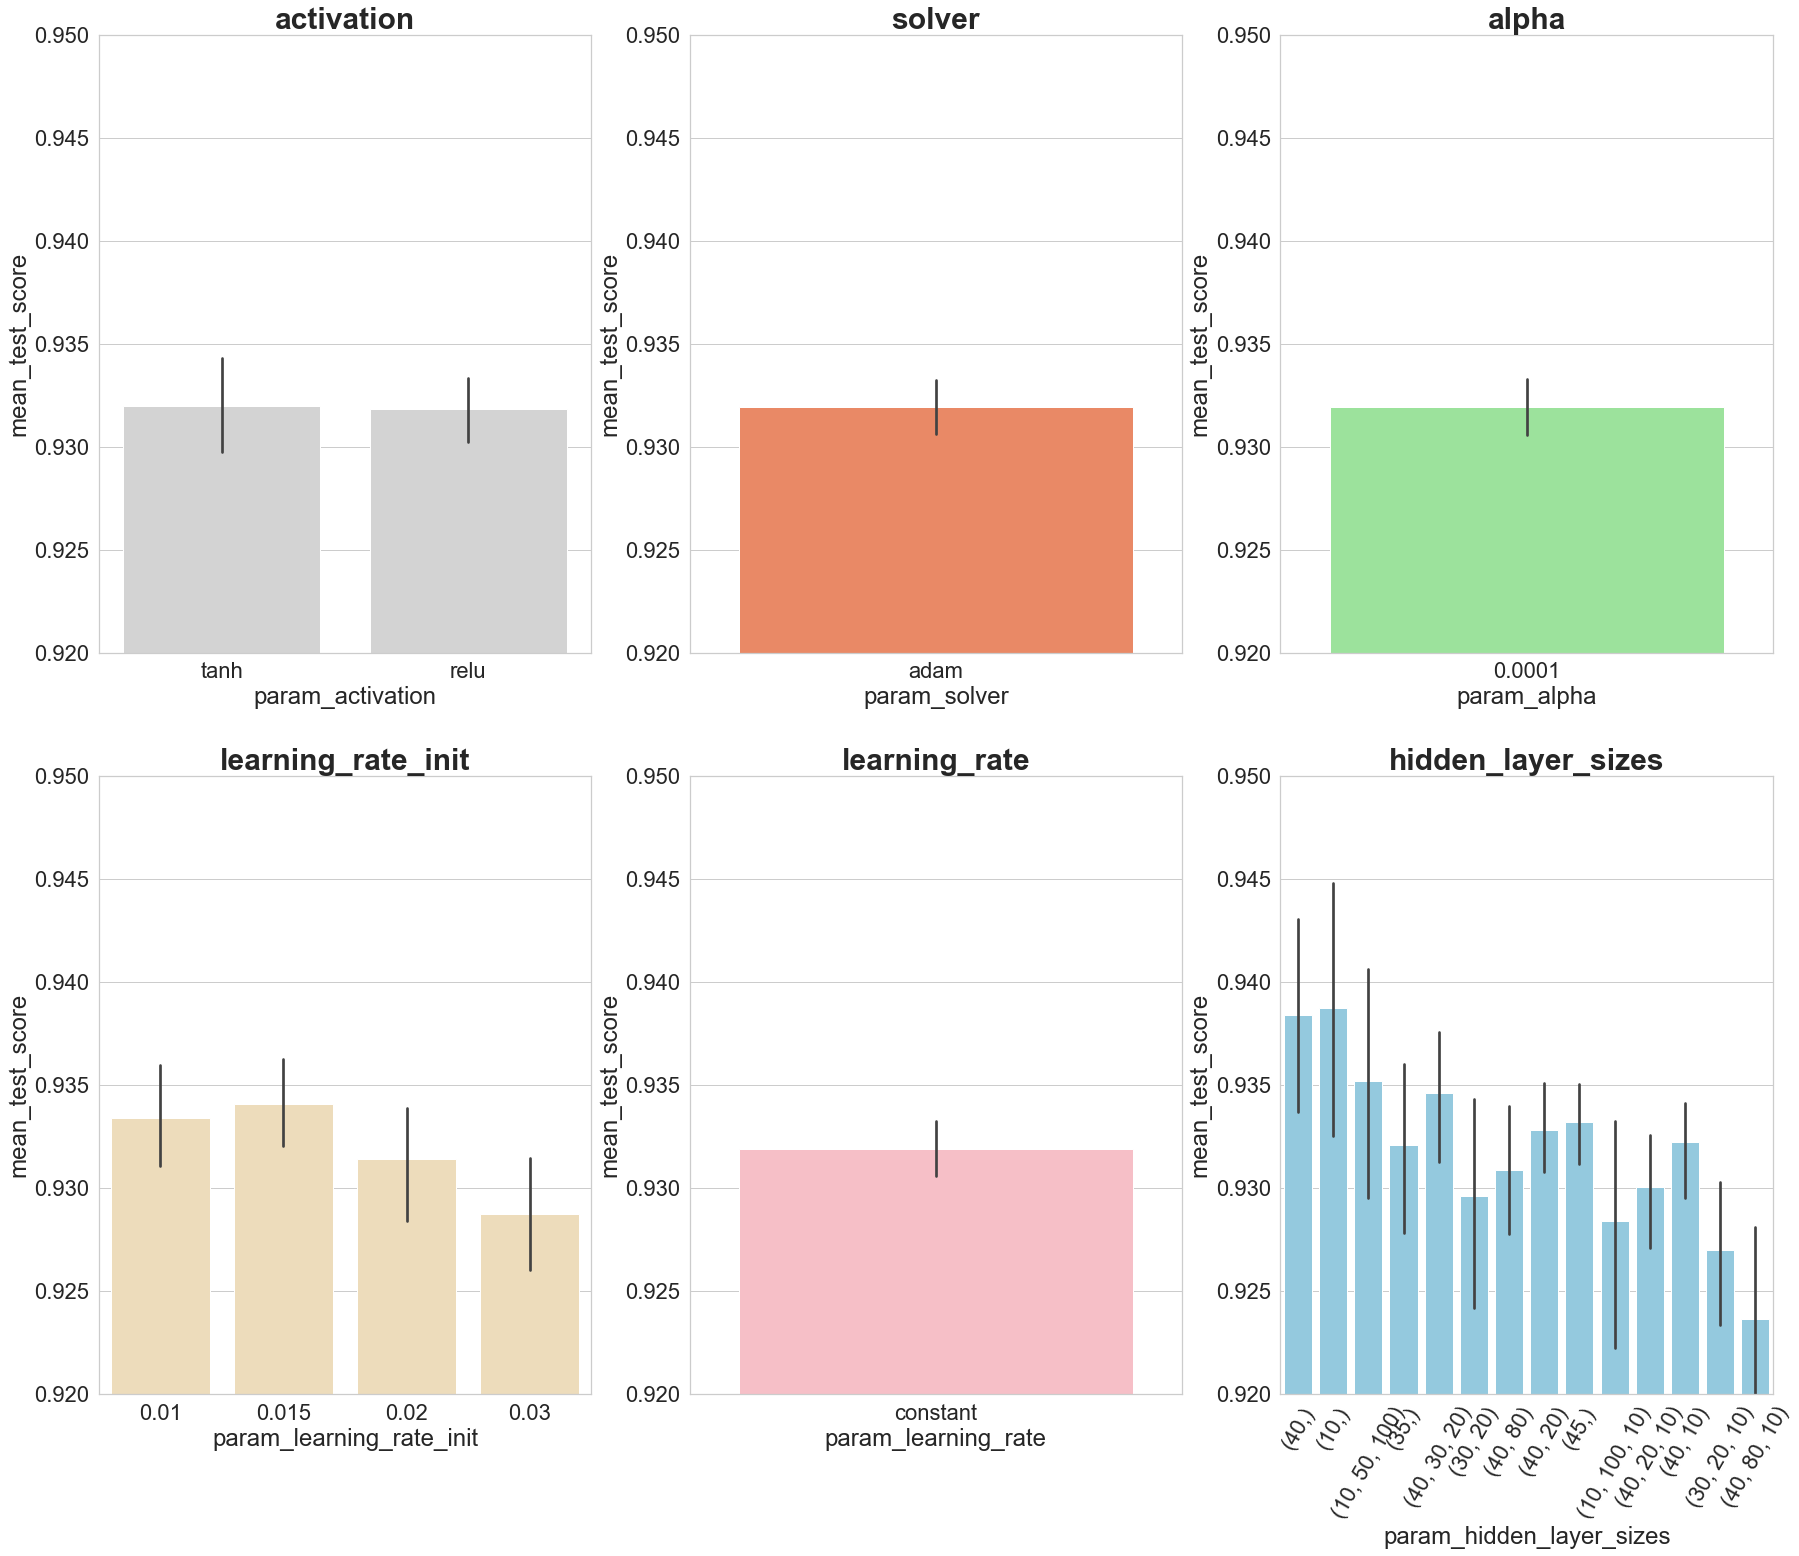

In [29]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_activation', y='mean_test_score', data=MLP_base_best2_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.92,.95]), axs[0,0].set_title(label = 'activation', size=30, weight='bold')
sns.barplot(x='param_solver', y='mean_test_score', data=MLP_base_best2_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.92,.95]), axs[0,1].set_title(label = 'solver', size=30, weight='bold')
sns.barplot(x='param_alpha', y='mean_test_score', data=MLP_base_best2_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.92,.95]), axs[0,2].set_title(label = 'alpha', size=30, weight='bold')
sns.barplot(x='param_learning_rate_init', y='mean_test_score', data=MLP_base_best2_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.92,.95]), axs[1,0].set_title(label = 'learning_rate_init', size=30, weight='bold')
sns.barplot(x='param_learning_rate', y='mean_test_score', data=MLP_base_best2_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.92,.95]), axs[1,1].set_title(label = 'learning_rate', size=30, weight='bold')
sns.barplot(x='param_hidden_layer_sizes',y='mean_test_score', data=MLP_base_best2_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.92,.95])
axs[1,2].set_title(label = 'hidden_layer_sizes', size=30, weight='bold')
plt.xticks(rotation=60)
plt.show()

# Grid MLP (iter 3)

In [30]:
mlp4 = MLPClassifier(random_state=42, verbose=True, max_iter=1000, early_stopping=True, n_iter_no_change=30)
activation = ['tanh', 'relu']
solver = ['adam']
alpha = [0.0001]
learning_rate_init = [0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017]
learning_rate = ['constant'] # остальные работают только с оптимизатором "sgd"
hidden_layer_sizes = [(5,),(6,),(7,),(8,),(9,),(10,),(11,),(12,),(13,),(14,),(15,),
                      (16,),(17,),(18,),(19,),(20,),(25,)]


param_grid = {'activation': activation,
               'solver': solver,
               'alpha': alpha,
               'learning_rate_init': learning_rate_init,
               'learning_rate': learning_rate,
               'hidden_layer_sizes': hidden_layer_sizes
}
gs3 = GridSearchCV(mlp4, param_grid, cv = 8, verbose = 3, n_jobs=-1)
gs3.fit(x_train_scaled, y_train)
mlp_base_best3 = gs3.best_estimator_
gs3.best_params_

Fitting 8 folds for each of 238 candidates, totalling 1904 fits
Iteration 1, loss = 0.90608909
Validation score: 0.845238
Iteration 2, loss = 0.38068395
Validation score: 0.880952
Iteration 3, loss = 0.28764568
Validation score: 0.904762
Iteration 4, loss = 0.24329898
Validation score: 0.880952
Iteration 5, loss = 0.22170185
Validation score: 0.892857
Iteration 6, loss = 0.20915368
Validation score: 0.880952
Iteration 7, loss = 0.19478194
Validation score: 0.892857
Iteration 8, loss = 0.18347734
Validation score: 0.910714
Iteration 9, loss = 0.17396156
Validation score: 0.916667
Iteration 10, loss = 0.16523398
Validation score: 0.910714
Iteration 11, loss = 0.15946997
Validation score: 0.910714
Iteration 12, loss = 0.15683678
Validation score: 0.898810
Iteration 13, loss = 0.14715198
Validation score: 0.910714
Iteration 14, loss = 0.14201615
Validation score: 0.904762
Iteration 15, loss = 0.14593187
Validation score: 0.910714
Iteration 16, loss = 0.13357546
Validation score: 0.898810
I

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (9,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.015,
 'solver': 'adam'}

In [31]:
joblib.dump(mlp_base_best3, "MLP_base_best3.pkl")

['MLP_base_best3.pkl']

In [32]:
MLP_base_best3 = joblib.load("MLP_base_best3.pkl")

In [33]:
print(classification_report(y_test, MLP_base_best3.predict(x_test_scaled)))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       341
           2       0.93      0.78      0.85        18
           3       0.82      0.82      0.82        22
           4       0.81      0.77      0.79        39

    accuracy                           0.95       420
   macro avg       0.88      0.84      0.86       420
weighted avg       0.95      0.95      0.95       420



<AxesSubplot:>

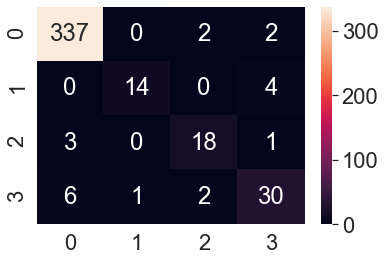

In [34]:
sns.heatmap(confusion_matrix(y_test,MLP_base_best3.predict(x_test_scaled)), annot=True, fmt="1")

In [35]:
MLP_base_best3_df = pd.DataFrame(gs3.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
MLP_base_best3_df = MLP_base_best3_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
MLP_base_best3_df.head(10)

,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_learning_rate_init,param_solver,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,rank_test_score
0,relu,0.0001,"(9,)",constant,0.015,adam,0.961905,0.947619,0.947619,0.966667,0.971429,0.953571,1
1,tanh,0.0001,"(16,)",constant,0.012,adam,0.966667,0.942857,0.938095,0.947619,0.952381,0.952976,2
2,tanh,0.0001,"(6,)",constant,0.017,adam,0.947619,0.933333,0.947619,0.942857,0.957143,0.952976,2
3,relu,0.0001,"(6,)",constant,0.013,adam,0.952381,0.947619,0.938095,0.938095,0.957143,0.952381,4
4,relu,0.0001,"(6,)",constant,0.016,adam,0.957143,0.942857,0.942857,0.928571,0.938095,0.951786,5
5,tanh,0.0001,"(16,)",constant,0.011,adam,0.952381,0.942857,0.947619,0.947619,0.952381,0.951786,5
6,relu,0.0001,"(6,)",constant,0.015,adam,0.947619,0.938095,0.933333,0.938095,0.952381,0.951786,5
7,relu,0.0001,"(6,)",constant,0.014,adam,0.957143,0.942857,0.928571,0.933333,0.952381,0.951190,8
8,tanh,0.0001,"(16,)",constant,0.016,adam,0.966667,0.933333,0.933333,0.947619,0.952381,0.950595,9
9,tanh,0.0001,"(20,)",constant,0.014,adam,0.966667,0.928571,0.942857,0.957143,0.942857,0.950595,9


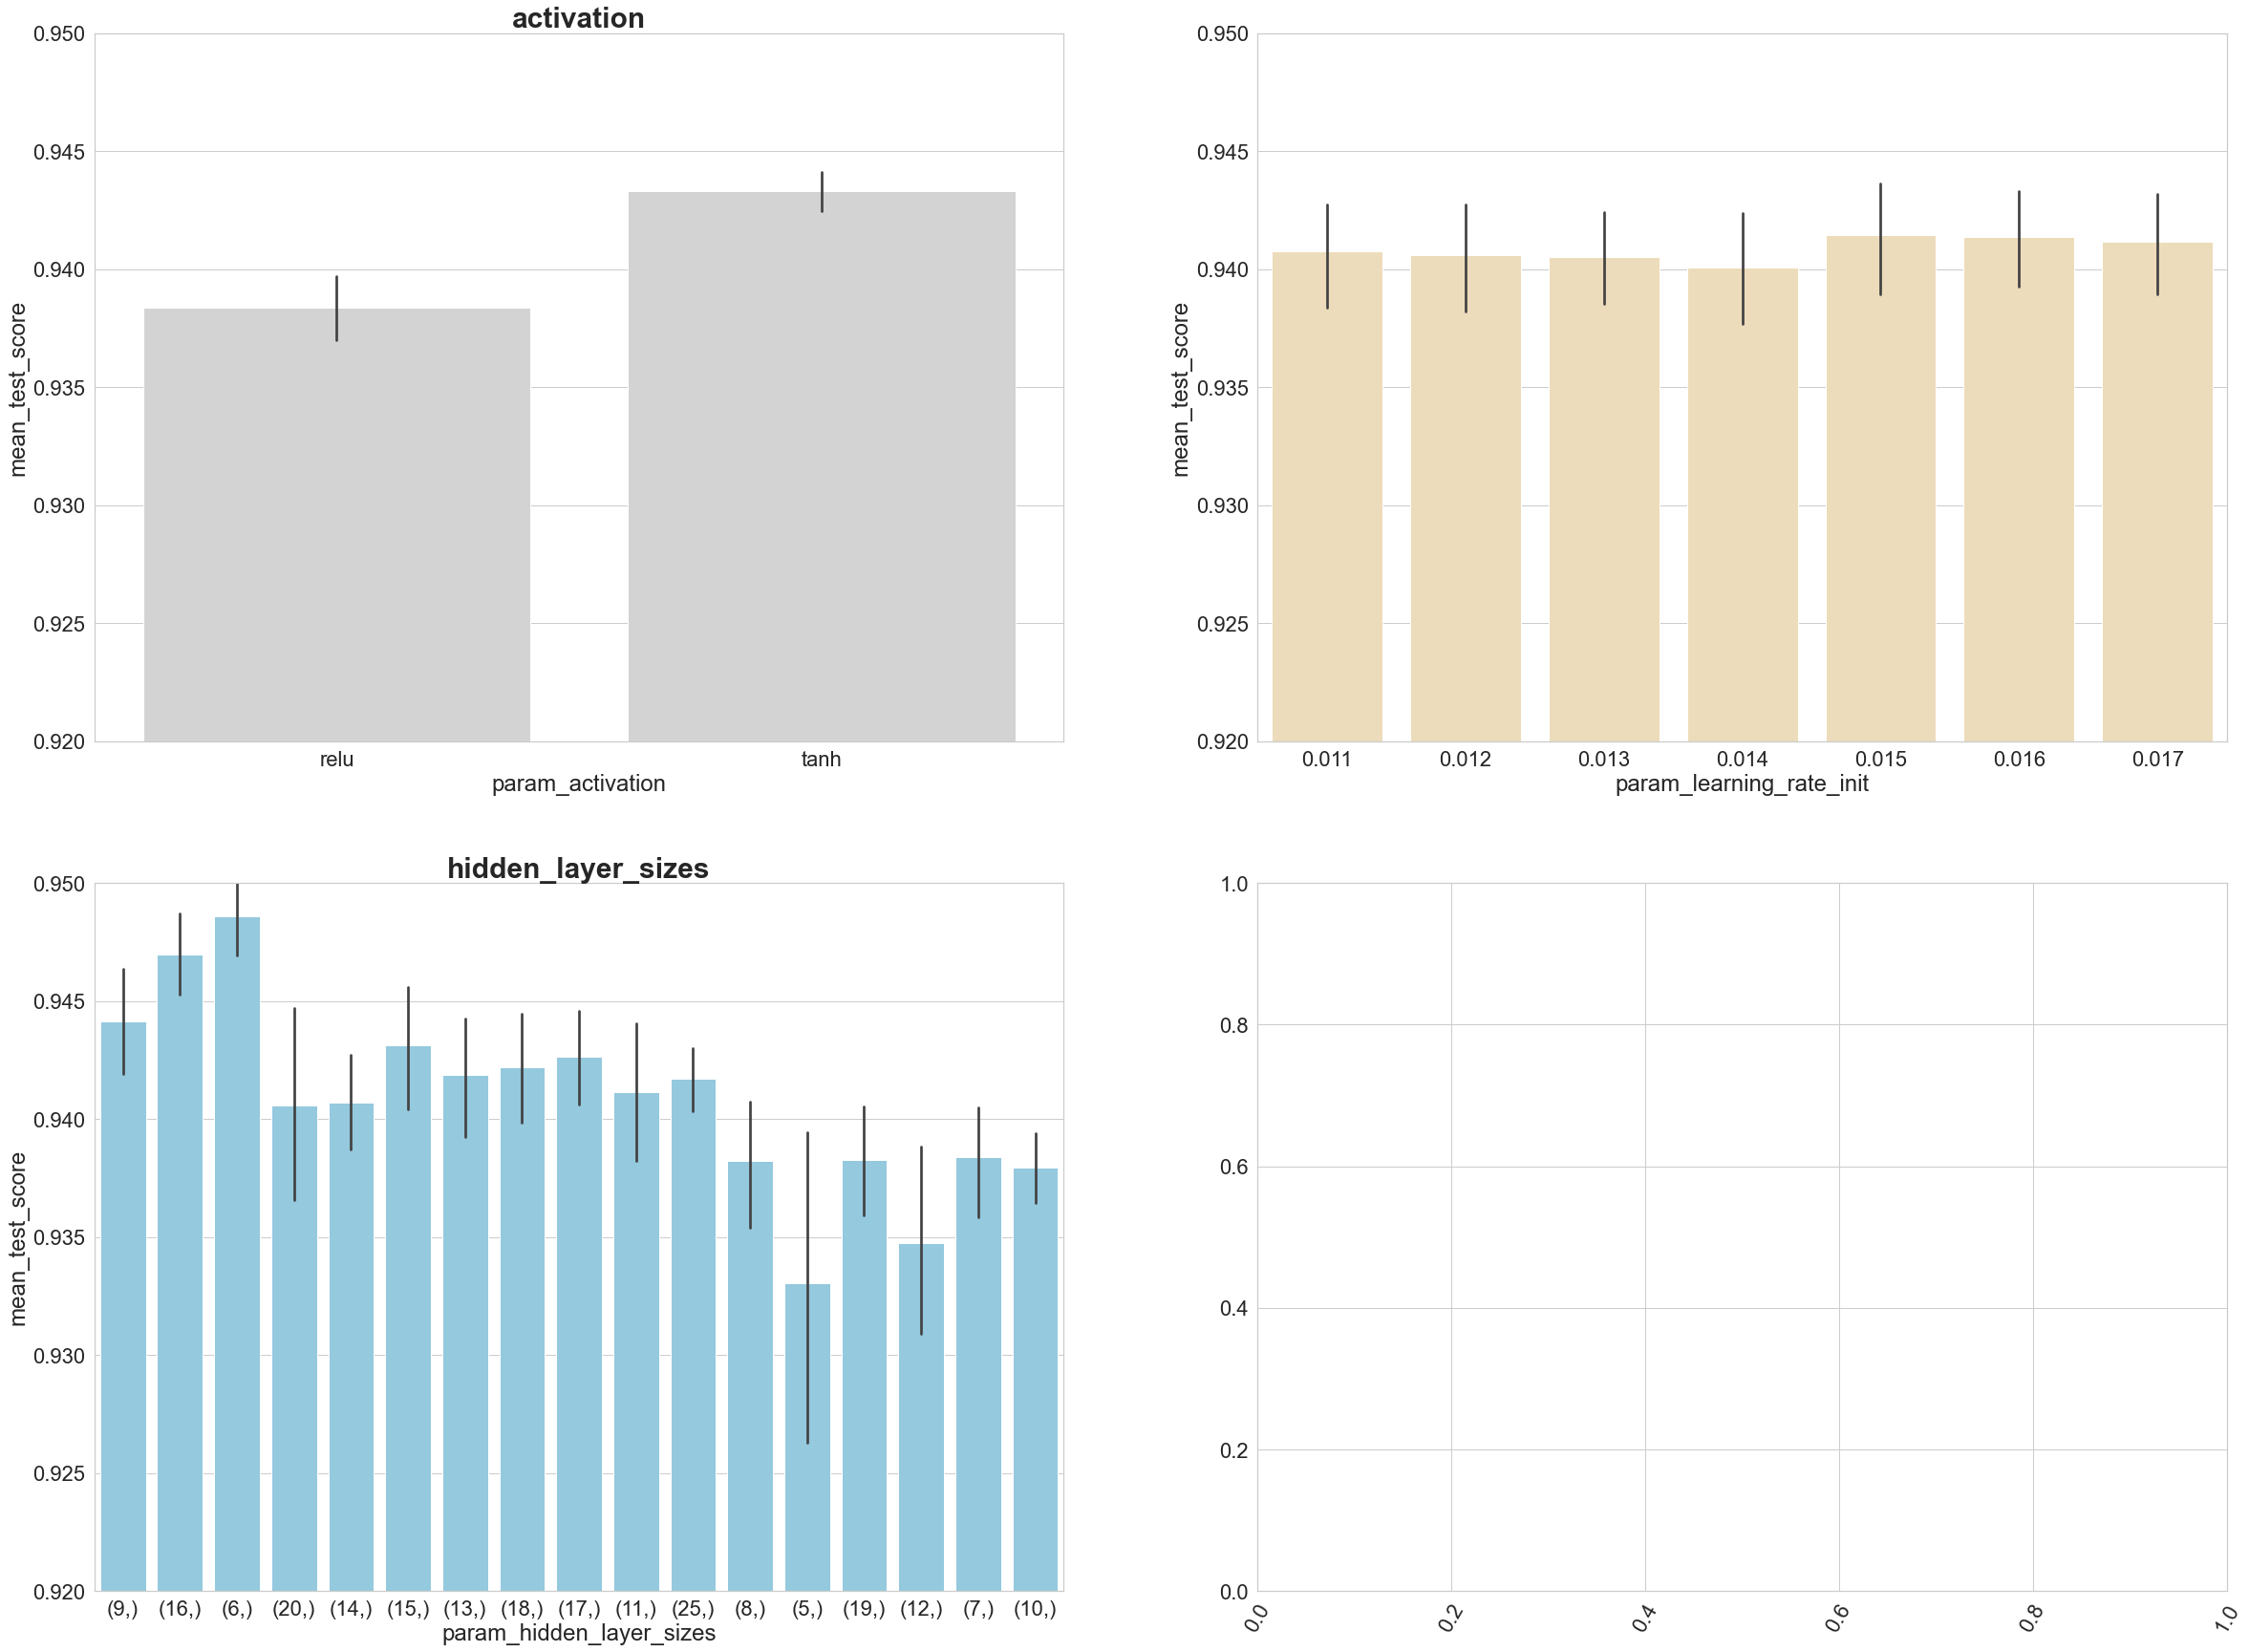

In [36]:
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(40,30)
sns.barplot(x='param_activation', y='mean_test_score', data=MLP_base_best3_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.92,.95]), axs[0,0].set_title(label = 'activation', size=30, weight='bold')

sns.barplot(x='param_learning_rate_init', y='mean_test_score', data=MLP_base_best3_df, ax=axs[0,1], color='wheat')
axs[0,1].set_ylim([.92,.95]), axs[1,0].set_title(label = 'learning_rate_init', size=30, weight='bold')

sns.barplot(x='param_hidden_layer_sizes',y='mean_test_score', data=MLP_base_best3_df, ax=axs[1,0], color='skyblue')
axs[1,0].set_ylim([.92,.95])
axs[1,0].set_title(label = 'hidden_layer_sizes', size=30, weight='bold')
plt.xticks(rotation=60)
plt.show()

# Grid MLP (iter 4)

In [37]:
mlp5 = MLPClassifier(random_state=42, verbose=True, max_iter=1000, early_stopping=True, n_iter_no_change=30)
activation = ['tanh']
solver = ['adam']
alpha = [0.0001]
learning_rate_init = [0.015, 0.016, 0.017]
learning_rate = ['constant'] # остальные работают только с оптимизатором "sgd"
hidden_layer_sizes = [(9,),(16,),(6,)]


param_grid = {'activation': activation,
               'solver': solver,
               'alpha': alpha,
               'learning_rate_init': learning_rate_init,
               'learning_rate': learning_rate,
               'hidden_layer_sizes': hidden_layer_sizes
}
gs4 = GridSearchCV(mlp5, param_grid, cv = 10, verbose = 3, n_jobs=-1)
gs4.fit(x_train_scaled, y_train)
mlp_base_best4 = gs4.best_estimator_
gs4.best_params_

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Iteration 1, loss = 1.00247965
Validation score: 0.761905
Iteration 2, loss = 0.60419281
Validation score: 0.892857
Iteration 3, loss = 0.35118488
Validation score: 0.898810
Iteration 4, loss = 0.22499068
Validation score: 0.922619
Iteration 5, loss = 0.19206501
Validation score: 0.928571
Iteration 6, loss = 0.16789788
Validation score: 0.928571
Iteration 7, loss = 0.15302469
Validation score: 0.934524
Iteration 8, loss = 0.13613241
Validation score: 0.940476
Iteration 9, loss = 0.13596109
Validation score: 0.940476
Iteration 10, loss = 0.14158917
Validation score: 0.940476
Iteration 11, loss = 0.13356470
Validation score: 0.952381
Iteration 12, loss = 0.12217067
Validation score: 0.952381
Iteration 13, loss = 0.12404222
Validation score: 0.922619
Iteration 14, loss = 0.10918200
Validation score: 0.958333
Iteration 15, loss = 0.11154136
Validation score: 0.934524
Iteration 16, loss = 0.10971512
Validation score: 0.952381
Iter

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (16,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.017,
 'solver': 'adam'}

In [38]:
joblib.dump(mlp_base_best4, "MLP_base_best4.pkl")

['MLP_base_best4.pkl']

In [39]:
MLP_base_best4 = joblib.load("MLP_base_best4.pkl")

In [40]:
print(classification_report(y_test, MLP_base_best4.predict(x_test_scaled)))

              precision    recall  f1-score   support

           1       0.99      0.97      0.98       341
           2       0.74      0.78      0.76        18
           3       0.70      0.73      0.71        22
           4       0.72      0.79      0.76        39

    accuracy                           0.93       420
   macro avg       0.78      0.82      0.80       420
weighted avg       0.93      0.93      0.93       420



<AxesSubplot:>

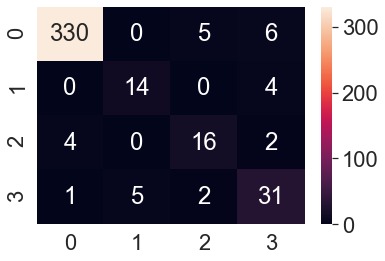

In [41]:
sns.heatmap(confusion_matrix(y_test,MLP_base_best4.predict(x_test_scaled)), annot=True, fmt="1")

In [42]:
MLP_base_best4_df = pd.DataFrame(gs4.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
MLP_base_best4_df = MLP_base_best4_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
MLP_base_best4_df.head(10)

,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_learning_rate_init,param_solver,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,rank_test_score
0,tanh,0.0001,"(16,)",constant,0.017,adam,0.958333,0.940476,0.946429,0.940476,0.940476,0.946429,0.964286,0.946429,1
1,tanh,0.0001,"(6,)",constant,0.015,adam,0.946429,0.946429,0.952381,0.922619,0.946429,0.946429,0.946429,0.945238,2
2,tanh,0.0001,"(16,)",constant,0.015,adam,0.946429,0.958333,0.958333,0.940476,0.934524,0.922619,0.946429,0.944643,3
3,tanh,0.0001,"(6,)",constant,0.016,adam,0.940476,0.952381,0.928571,0.922619,0.940476,0.952381,0.946429,0.942857,4
4,tanh,0.0001,"(6,)",constant,0.017,adam,0.934524,0.958333,0.916667,0.910714,0.952381,0.928571,0.958333,0.942857,4
5,tanh,0.0001,"(16,)",constant,0.016,adam,0.946429,0.946429,0.946429,0.940476,0.940476,0.922619,0.928571,0.941667,6
6,tanh,0.0001,"(9,)",constant,0.017,adam,0.928571,0.934524,0.916667,0.916667,0.958333,0.934524,0.922619,0.938095,7
7,tanh,0.0001,"(9,)",constant,0.016,adam,0.922619,0.928571,0.934524,0.922619,0.958333,0.922619,0.928571,0.937500,8
8,tanh,0.0001,"(9,)",constant,0.015,adam,0.916667,0.934524,0.904762,0.904762,0.958333,0.940476,0.928571,0.932738,9


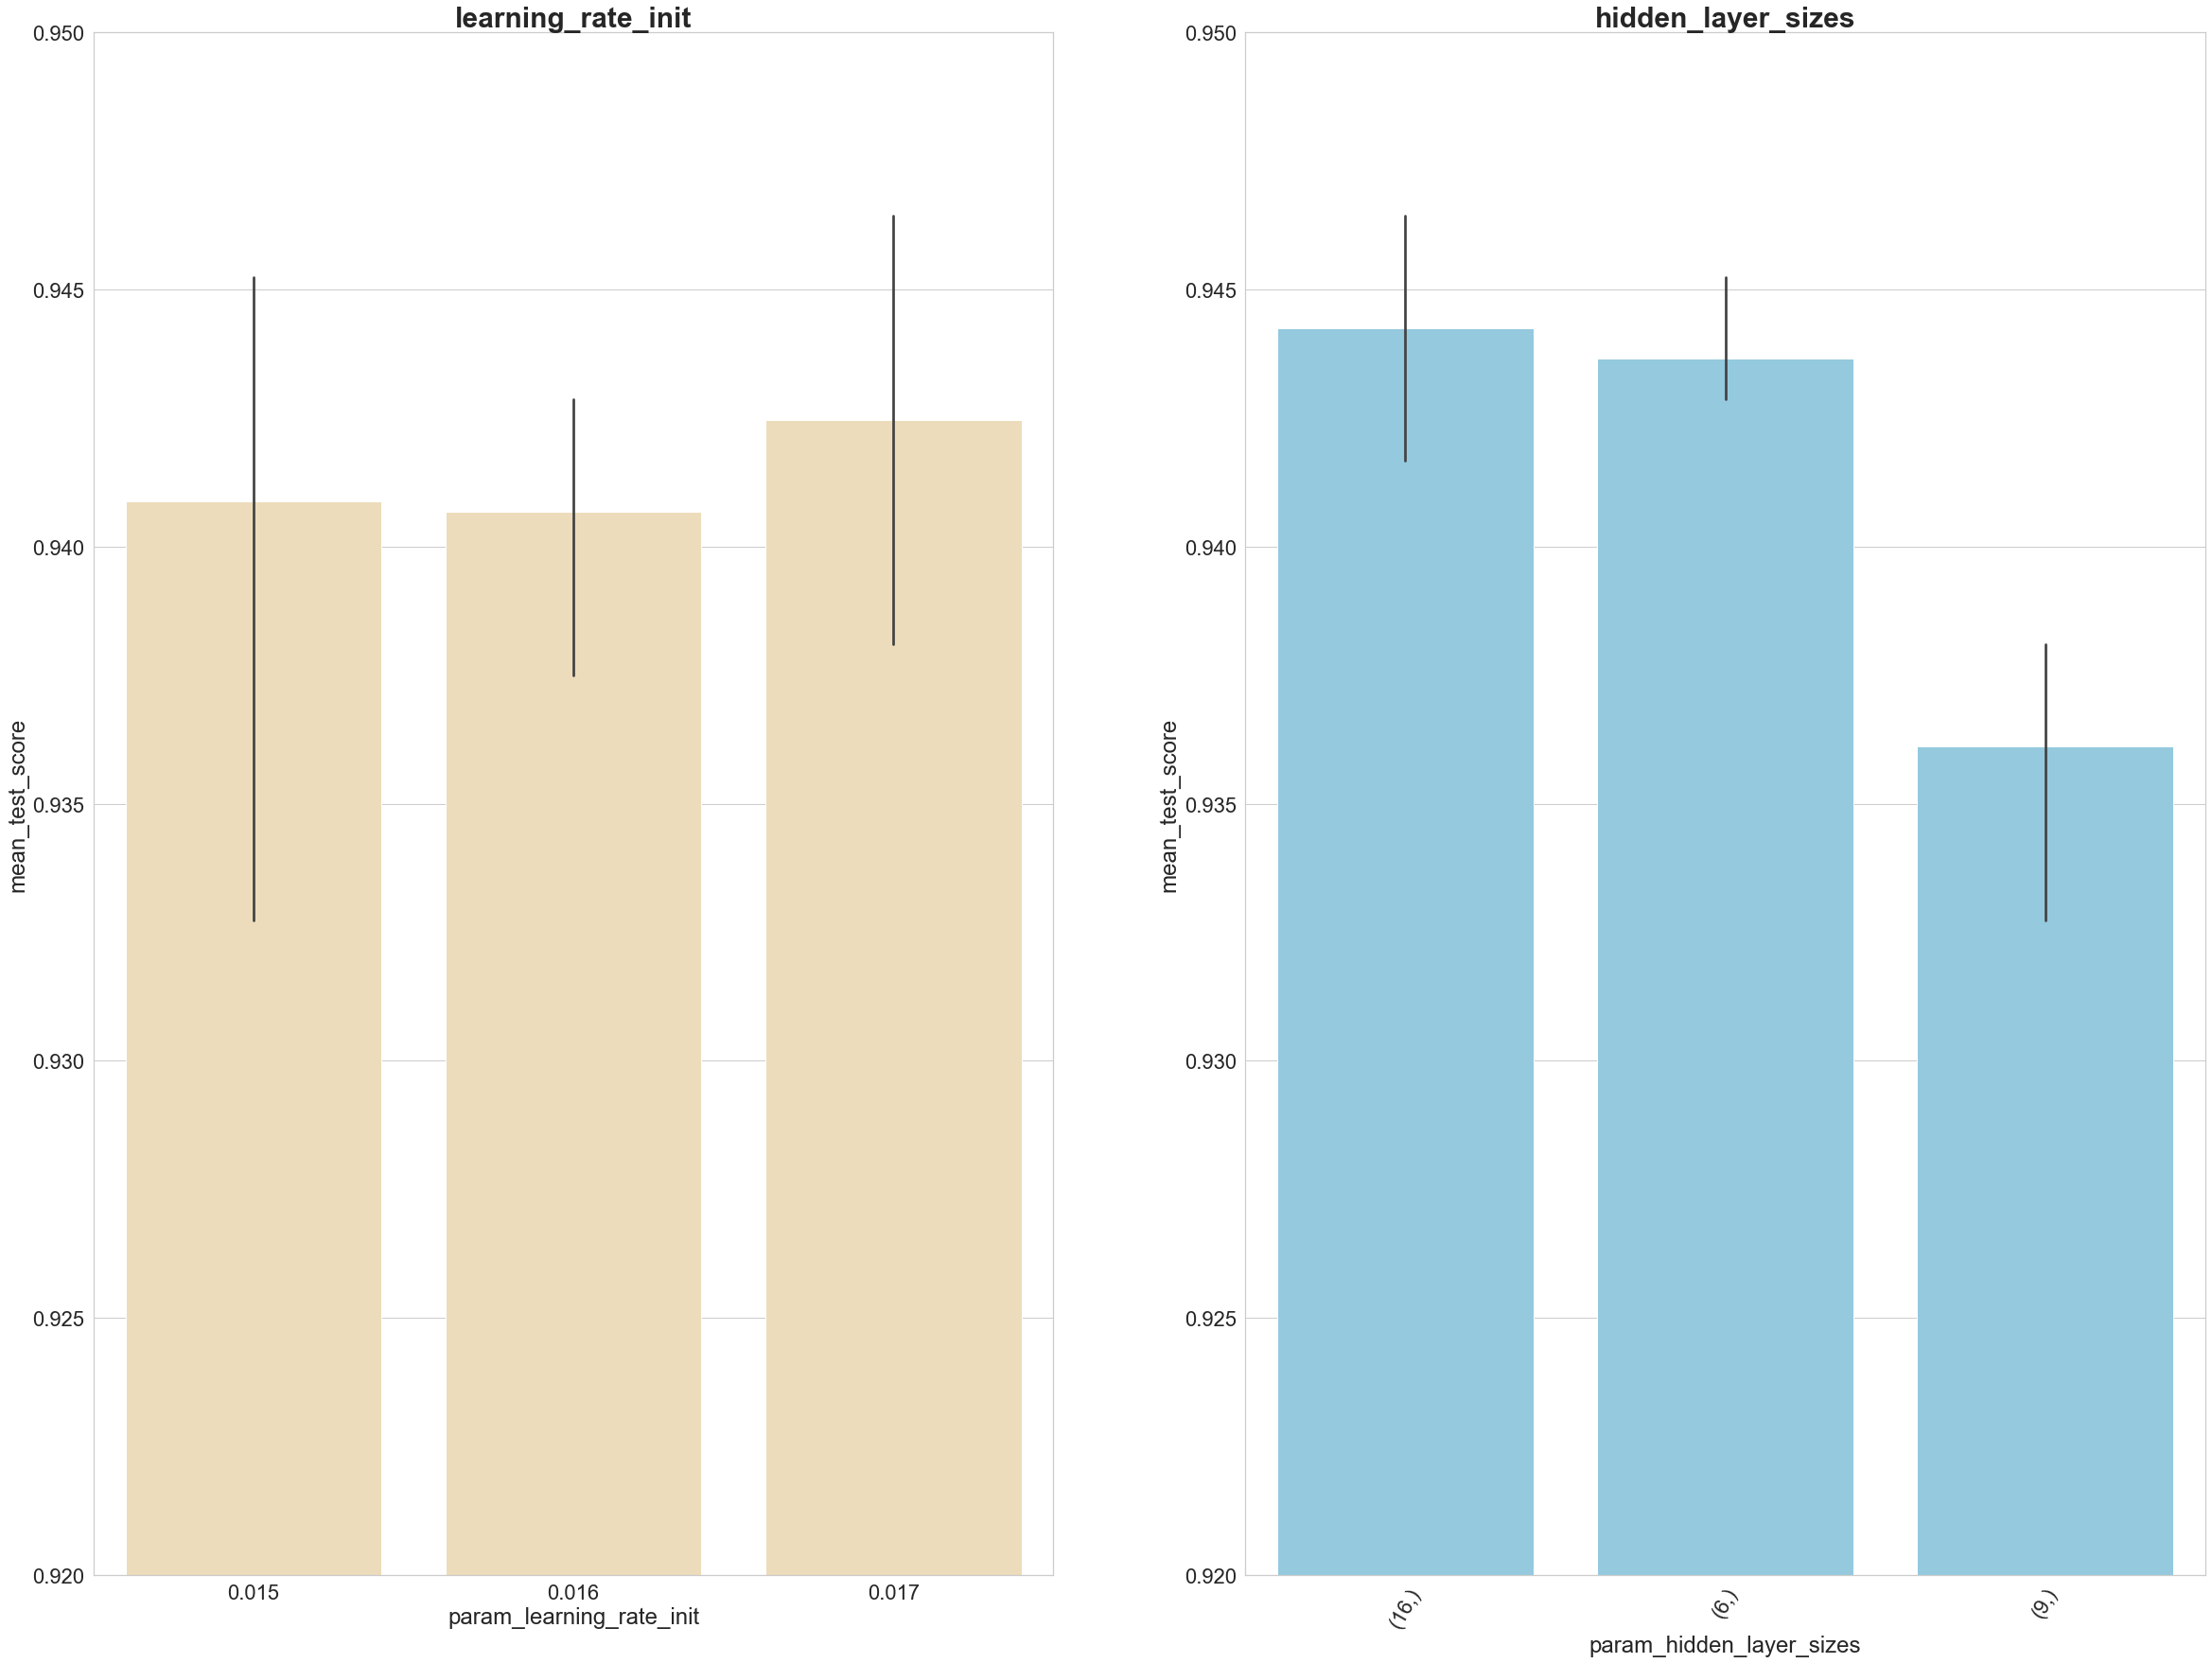

In [45]:
fig, axs = plt.subplots(ncols=2, nrows=1)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(40,30)

sns.barplot(x='param_learning_rate_init', y='mean_test_score', data=MLP_base_best4_df, ax=axs[0], color='wheat')
axs[0].set_ylim([.92,.95]), axs[0].set_title(label = 'learning_rate_init', size=30, weight='bold')

sns.barplot(x='param_hidden_layer_sizes',y='mean_test_score', data=MLP_base_best4_df, ax=axs[1], color='skyblue')
axs[1].set_ylim([.92,.95])
axs[1].set_title(label = 'hidden_layer_sizes', size=30, weight='bold')
plt.xticks(rotation=60)
plt.show()

# Grid MLP (iter 5)

In [46]:
mlp6 = MLPClassifier(random_state=42, verbose=True, max_iter=1000, early_stopping=True, n_iter_no_change=30)
activation = ['tanh', 'relu']
solver = ['adam']
alpha = [0.0001]
learning_rate_init = [0.014, 0.015, 0.016, 0.017]
learning_rate = ['constant'] # остальные работают только с оптимизатором "sgd"
hidden_layer_sizes = [(40,),(35,),(36,),(37,),(38,),(39,),(41,),(42,),(43,),(44,),(45,)]


param_grid = {'activation': activation,
               'solver': solver,
               'alpha': alpha,
               'learning_rate_init': learning_rate_init,
               'learning_rate': learning_rate,
               'hidden_layer_sizes': hidden_layer_sizes
}
gs5 = GridSearchCV(mlp6, param_grid, cv = 10, verbose = 3, n_jobs=-1)
gs5.fit(x_train_scaled, y_train)
mlp_base_best5 = gs5.best_estimator_
gs5.best_params_

Fitting 10 folds for each of 88 candidates, totalling 880 fits
Iteration 1, loss = 1.19639324
Validation score: 0.744048
Iteration 2, loss = 0.63528932
Validation score: 0.904762
Iteration 3, loss = 0.34394833
Validation score: 0.910714
Iteration 4, loss = 0.23255630
Validation score: 0.946429
Iteration 5, loss = 0.17816458
Validation score: 0.958333
Iteration 6, loss = 0.16295105
Validation score: 0.940476
Iteration 7, loss = 0.14732334
Validation score: 0.940476
Iteration 8, loss = 0.14184603
Validation score: 0.940476
Iteration 9, loss = 0.13713812
Validation score: 0.946429
Iteration 10, loss = 0.13208506
Validation score: 0.946429
Iteration 11, loss = 0.12194673
Validation score: 0.952381
Iteration 12, loss = 0.11706414
Validation score: 0.922619
Iteration 13, loss = 0.11916429
Validation score: 0.928571
Iteration 14, loss = 0.11708516
Validation score: 0.952381
Iteration 15, loss = 0.10515737
Validation score: 0.928571
Iteration 16, loss = 0.11055161
Validation score: 0.916667
It

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (41,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.014,
 'solver': 'adam'}

In [47]:
joblib.dump(mlp_base_best5, "MLP_base_best5.pkl")

['MLP_base_best5.pkl']

In [48]:
MLP_base_best5 = joblib.load("MLP_base_best5.pkl")

In [49]:
print(classification_report(y_test, MLP_base_best5.predict(x_test_scaled)))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       341
           2       0.73      0.89      0.80        18
           3       0.83      0.68      0.75        22
           4       0.79      0.69      0.74        39

    accuracy                           0.94       420
   macro avg       0.83      0.81      0.82       420
weighted avg       0.94      0.94      0.94       420



<AxesSubplot:>

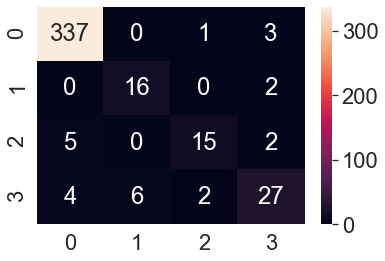

In [50]:
sns.heatmap(confusion_matrix(y_test,MLP_base_best5.predict(x_test_scaled)), annot=True, fmt="1")

In [51]:
MLP_base_best5_df = pd.DataFrame(gs5.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
MLP_base_best5_df = MLP_base_best5_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
MLP_base_best5_df.head(10)

,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_learning_rate_init,param_solver,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,rank_test_score
0,tanh,0.0001,"(41,)",constant,0.014,adam,0.952381,0.958333,0.964286,0.946429,0.952381,0.922619,0.958333,0.953571,1
1,relu,0.0001,"(42,)",constant,0.014,adam,0.946429,0.952381,0.946429,0.952381,0.946429,0.928571,0.946429,0.950595,2
2,tanh,0.0001,"(41,)",constant,0.015,adam,0.952381,0.958333,0.952381,0.934524,0.940476,0.928571,0.958333,0.949405,3
3,relu,0.0001,"(41,)",constant,0.015,adam,0.946429,0.964286,0.940476,0.934524,0.952381,0.934524,0.940476,0.949405,3
4,tanh,0.0001,"(41,)",constant,0.016,adam,0.946429,0.958333,0.946429,0.940476,0.940476,0.958333,0.940476,0.949405,3
5,relu,0.0001,"(42,)",constant,0.017,adam,0.934524,0.946429,0.952381,0.952381,0.934524,0.952381,0.946429,0.949405,3
6,tanh,0.0001,"(42,)",constant,0.017,adam,0.964286,0.964286,0.916667,0.922619,0.952381,0.940476,0.940476,0.948214,7
7,relu,0.0001,"(35,)",constant,0.014,adam,0.952381,0.952381,0.958333,0.922619,0.934524,0.946429,0.946429,0.947619,8
8,relu,0.0001,"(43,)",constant,0.014,adam,0.940476,0.916667,0.940476,0.922619,0.946429,0.946429,0.952381,0.947619,8
9,relu,0.0001,"(42,)",constant,0.016,adam,0.952381,0.952381,0.928571,0.958333,0.952381,0.928571,0.928571,0.947024,10


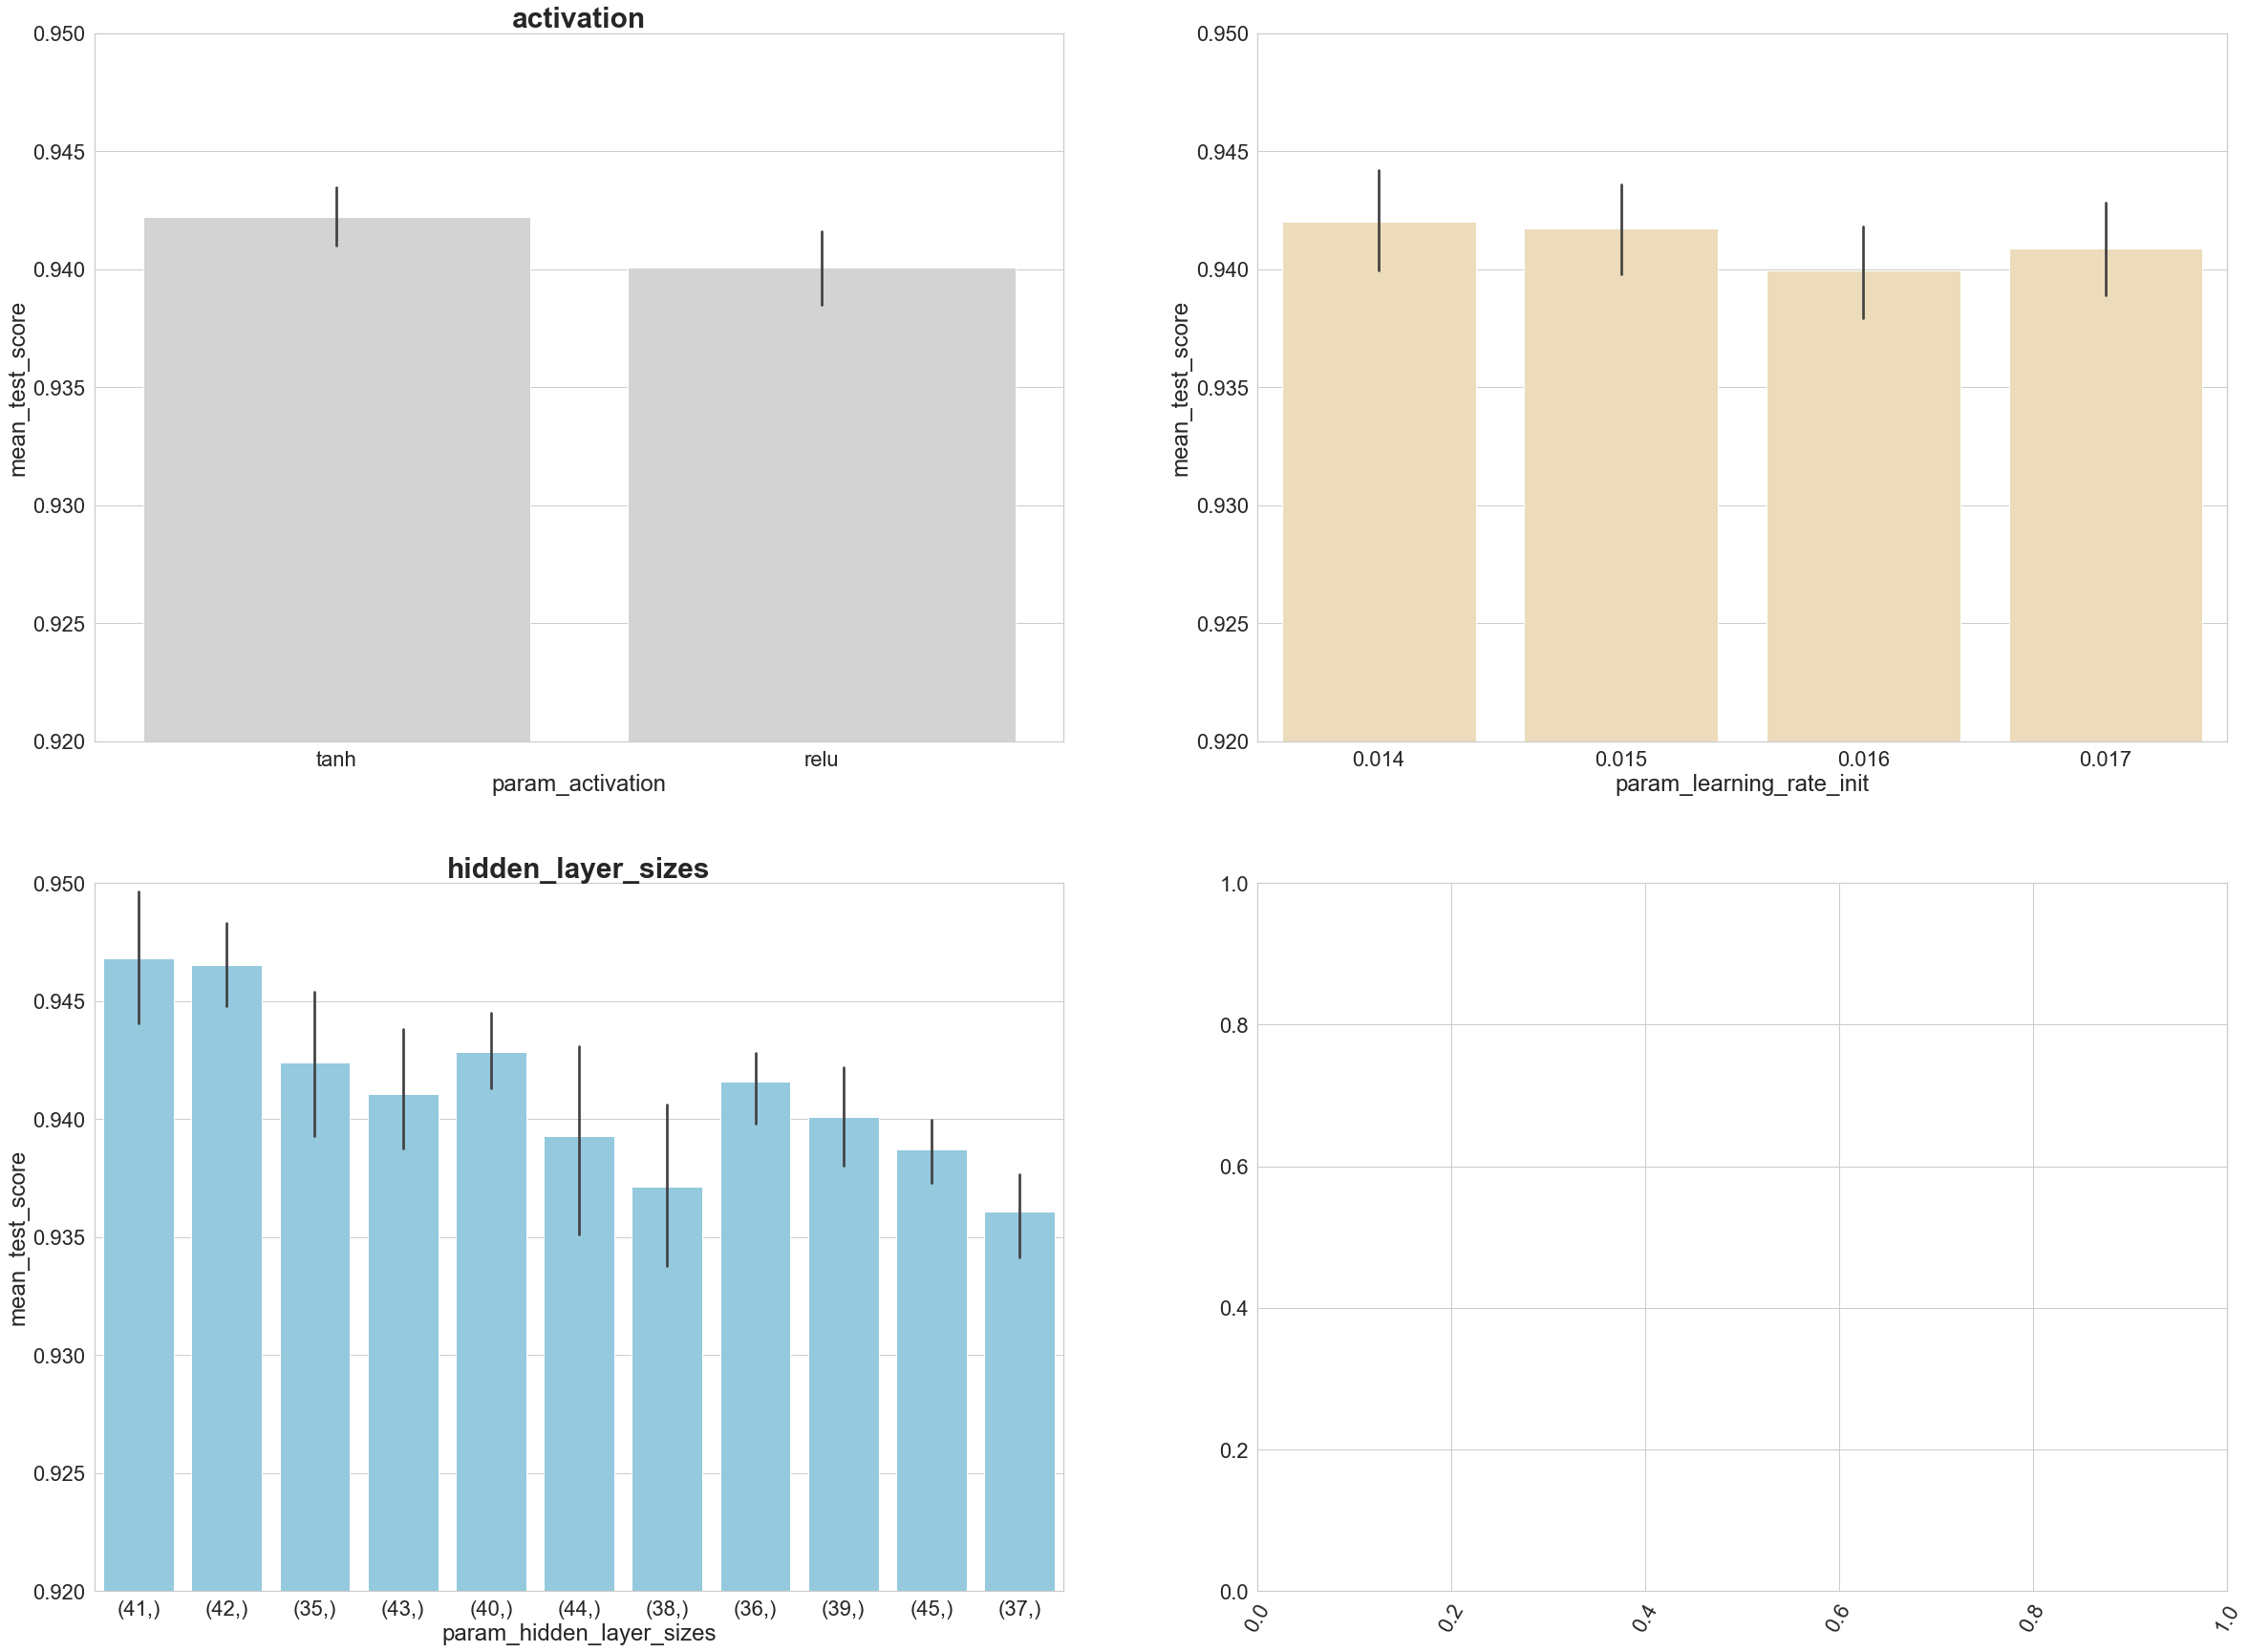

In [52]:
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(40,30)
sns.barplot(x='param_activation', y='mean_test_score', data=MLP_base_best5_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.92,.95]), axs[0,0].set_title(label = 'activation', size=30, weight='bold')

sns.barplot(x='param_learning_rate_init', y='mean_test_score', data=MLP_base_best5_df, ax=axs[0,1], color='wheat')
axs[0,1].set_ylim([.92,.95]), axs[1,0].set_title(label = 'learning_rate_init', size=30, weight='bold')

sns.barplot(x='param_hidden_layer_sizes',y='mean_test_score', data=MLP_base_best5_df, ax=axs[1,0], color='skyblue')
axs[1,0].set_ylim([.92,.95])
axs[1,0].set_title(label = 'hidden_layer_sizes', size=30, weight='bold')
plt.xticks(rotation=60)
plt.show()

# Сравнение моделей

Для сравнения возьмем модели с самым низким количеством ошибок о ложных срабатываниях и пропуске дефектов

In [53]:
MLP_base_best2 = joblib.load("MLP_base_best2.pkl") # (40,) tanh
MLP_base_best3 = joblib.load("MLP_base_best3.pkl") # (9,) relu

In [54]:
print("Многослойный персептрон")
print("Скрытые слои: (40,). Функция активации: ReLu")
print(classification_report(y_test, MLP_base_best2.predict(x_test_scaled)))

Многослойный персептрон
Скрытые слои: (40,). Функция активации: ReLu
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       341
           2       0.71      0.94      0.81        18
           3       0.90      0.82      0.86        22
           4       0.86      0.64      0.74        39

    accuracy                           0.95       420
   macro avg       0.86      0.85      0.85       420
weighted avg       0.95      0.95      0.95       420



In [55]:
print("Многослойный персептрон")
print("Скрытые слои: (9,). Функция активации: Tanh")
print(classification_report(y_test, MLP_base_best3.predict(x_test_scaled)))

Многослойный персептрон
Скрытые слои: (9,). Функция активации: Tanh
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       341
           2       0.93      0.78      0.85        18
           3       0.82      0.82      0.82        22
           4       0.81      0.77      0.79        39

    accuracy                           0.95       420
   macro avg       0.88      0.84      0.86       420
weighted avg       0.95      0.95      0.95       420



Многослойный персептрон
Скрытые слои: (40,). Функция активации: ReLu


<AxesSubplot:>

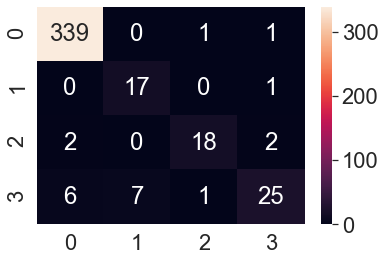

In [56]:
print("Многослойный персептрон")
print("Скрытые слои: (40,). Функция активации: ReLu")
sns.heatmap(confusion_matrix(y_test,MLP_base_best2.predict(x_test_scaled)), annot=True, fmt="1")

Многослойный персептрон
Скрытые слои: (9,). Функция активации: Tanh


<AxesSubplot:>

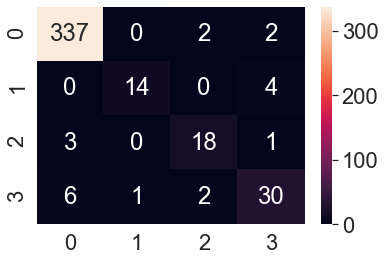

In [57]:
print("Многослойный персептрон")
print("Скрытые слои: (9,). Функция активации: Tanh")
sns.heatmap(confusion_matrix(y_test,MLP_base_best3.predict(x_test_scaled)), annot=True, fmt="1")

Из матриц ошибок делаем следующие выводы:

1) Первая модель (1 слой, 40 нейронов, активация ReLu) пропустила 0,5% дефектов от общего числа измерений или 3% из всех дефектов против 1% и 5,5% у второй модели, соответственно.

2) Первая модель показала меньше ложных дефектов - 2% от всех измерений и 10.1% процентов из числа всех меток, определенных моделью как дефект, против 2.15% и 11.4% у второй модели, соответственно.

3) В 15.5% случаев первая модель, правильно определив наличие дефекта, ошиблась в его типе против 11.4% у второй модели. Однако, данные показатели не столь критичны для целей безопасной эксплуатации, как пропуск действительного дефекта.

Оценим так же качество моделей по ROC-кривым

# ROC-кривые (бинарные метки)

In [58]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
X = df.drop("label", axis = 1).copy()
y = df["label"]
y = label_binarize(y, classes=[1, 2, 3, 4])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)
scal = StandardScaler()
x_train_scaled = scal.fit_transform(x_train)
x_test_scaled = scal.transform(x_test)
x_train_scaled.shape

(1680, 52)

In [61]:
n_classes = y.shape[1]

In [60]:
MLP_base_best2.fit(x_train_scaled, y_train)
MLP_base_best3.fit(x_train_scaled, y_train)

Iteration 1, loss = 2.09508306
Validation score: 0.630952
Iteration 2, loss = 1.29911537
Validation score: 0.791667
Iteration 3, loss = 0.80872589
Validation score: 0.797619
Iteration 4, loss = 0.56718428
Validation score: 0.809524
Iteration 5, loss = 0.45817479
Validation score: 0.851190
Iteration 6, loss = 0.40586952
Validation score: 0.827381
Iteration 7, loss = 0.38044676
Validation score: 0.845238
Iteration 8, loss = 0.36506771
Validation score: 0.839286
Iteration 9, loss = 0.34137683
Validation score: 0.875000
Iteration 10, loss = 0.32087497
Validation score: 0.851190
Iteration 11, loss = 0.32007499
Validation score: 0.863095
Iteration 12, loss = 0.29950079
Validation score: 0.892857
Iteration 13, loss = 0.28899461
Validation score: 0.904762
Iteration 14, loss = 0.27903630
Validation score: 0.892857
Iteration 15, loss = 0.27487541
Validation score: 0.898810
Iteration 16, loss = 0.26601493
Validation score: 0.898810
Iteration 17, loss = 0.25761336
Validation score: 0.904762
Iterat

Validation score: 0.910714
Iteration 71, loss = 0.19639883
Validation score: 0.886905
Iteration 72, loss = 0.19609364
Validation score: 0.910714
Iteration 73, loss = 0.19832433
Validation score: 0.892857
Iteration 74, loss = 0.19858243
Validation score: 0.898810
Iteration 75, loss = 0.19670568
Validation score: 0.892857
Iteration 76, loss = 0.20588924
Validation score: 0.904762
Iteration 77, loss = 0.19551423
Validation score: 0.886905
Iteration 78, loss = 0.18831636
Validation score: 0.898810
Iteration 79, loss = 0.19005198
Validation score: 0.880952
Iteration 80, loss = 0.20299347
Validation score: 0.898810
Validation score did not improve more than tol=0.000100 for 30 consecutive epochs. Stopping.


MLPClassifier(early_stopping=True, hidden_layer_sizes=(9,),
              learning_rate_init=0.015, max_iter=1000, n_iter_no_change=30,
              random_state=42, verbose=True)

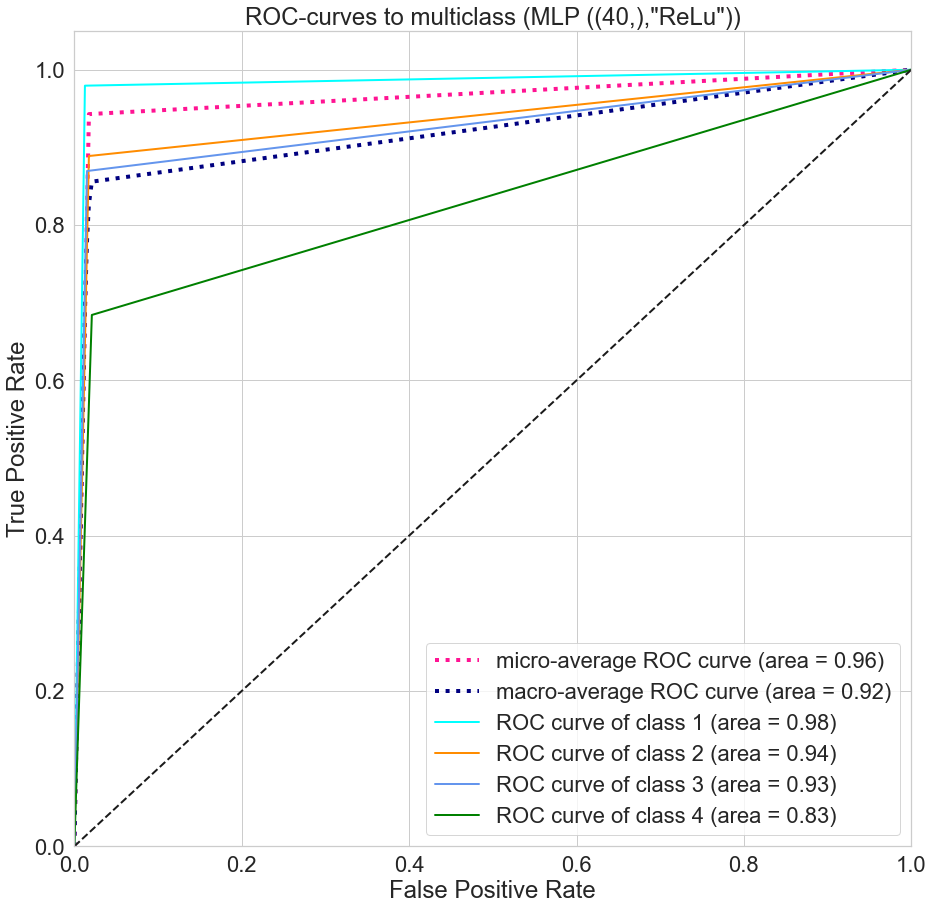

In [66]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], MLP_base_best2.predict(x_test_scaled)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), MLP_base_best2.predict(x_test_scaled).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(15,15))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
lw=2
colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i+1, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('''ROC-curves to multiclass (MLP ((40,),"ReLu"))''')
plt.legend(loc="lower right")
plt.show()

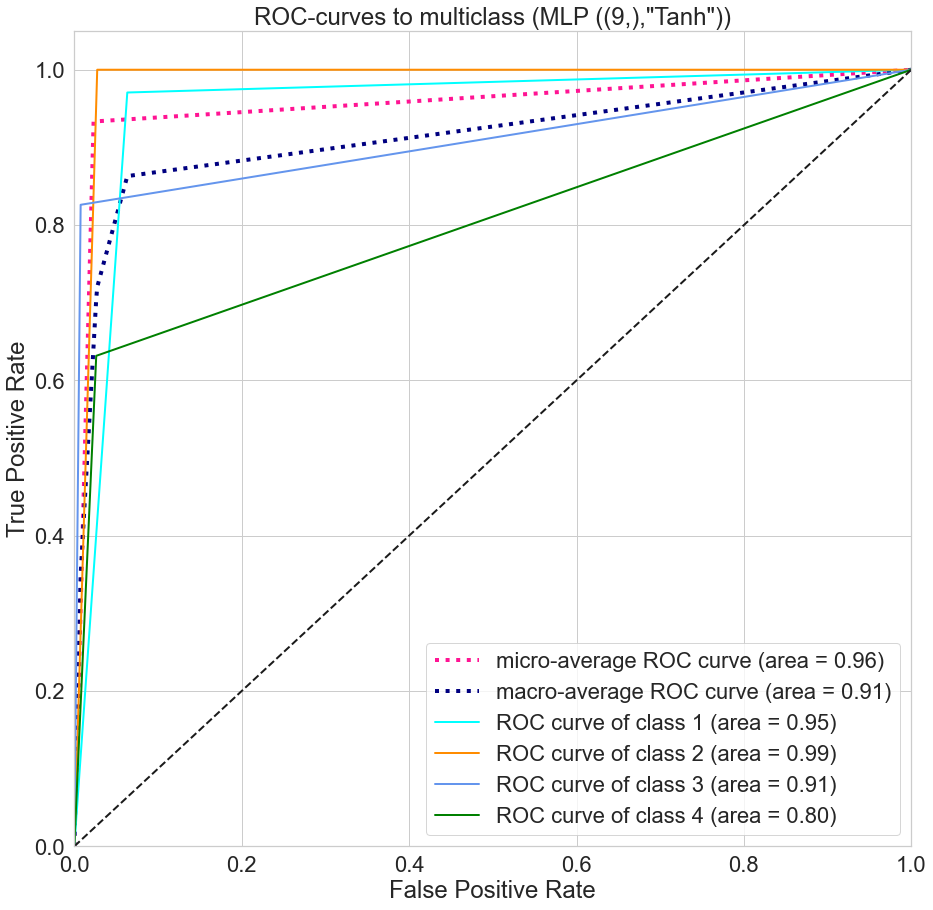

In [67]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], MLP_base_best3.predict(x_test_scaled)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), MLP_base_best3.predict(x_test_scaled).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(15,15))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
lw=2
colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i+1, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('''ROC-curves to multiclass (MLP ((9,),"Tanh"))''')
plt.legend(loc="lower right")
plt.show()

Как видно из ROC-кривых, первая модель (MLP ((40,),"ReLu") - лучше и по метрике ROC-AUC по всем классам, кроме класса 2, т.к. немного чаще ошибается при определении типа дефекта.

Для дальнейшего использования возьмем первую модель.

In [2]:
import nbformat as nbf
from glob import glob

import uuid
def get_cell_id(id_length=8):
    return uuid.uuid4().hex[:id_length]

# your notebook name/keyword
nb_name = 'MLP_clf_tunning'
notebooks = list(filter(lambda x: nb_name in x, glob("./*.ipynb", recursive=True)))

# iterate over notebooks
for ipath in sorted(notebooks):
    # load notebook
    ntbk = nbf.read(ipath, nbf.NO_CONVERT)
    
    cell_ids = []
    for cell in ntbk.cells:
        cell_ids.append(cell['id'])

    # reset cell ids if there are duplicates
    if not len(cell_ids) == len(set(cell_ids)): 
        for cell in ntbk.cells:
            cell['id'] = get_cell_id()

    nbf.write(ntbk, ipath)